<a href="https://colab.research.google.com/github/rrahman100/ml-course-r/blob/master/S4_crash_summary2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install io
!pip install folium
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import io
import folium
from folium.plugins import HeatMap
from google.colab import files
import matplotlib.pyplot as plt
from io import BytesIO

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


In [ ]:
# Upload raw crash data (csv) file
uploaded = files.upload()

# Get the file name from the uploaded files
file_name = list(uploaded.keys())[0]

# Read the CSV file with specified encoding
df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin-1')

# Print column names
print(df.columns)

Saving entireUS19.csv to entireUS19 (3).csv
Index(['REPORT_NUMBER', 'INVESTIGATING_AGENCY_REPORT_NUMBER', 'FORM_TYPE',
       'CODEABLE', 'MAPPING_STATUS', 'PRELIMINARY_GEOLOC_STATUS',
       'DOT_EDIT_STATUS', 'DOT_REVIEW_STATUS', 'CRASH_YEAR',
       'CRASH_DATE_AND_TIME',
       ...
       'field_371', 'field_372', 'field_373', 'field_374', 'field_375',
       'field_376', 'field_377', 'field_378', 'field_379', 'field_380'],
      dtype='object', length=380)


In [ ]:
# ------------------------------------- per year
# Define the columns of interest
df['S4_IS_DUI'] = np.where((df['S4_IS_ALCOHOL_RELATED'] == 'Y') | (df['S4_IS_DRUG_RELATED'] == 'Y'), 'Y', 'N')

summary_columns = [
    'LIGHT_CONDITION',
    'S4_CRASH_TYPE_SIMPLIFIED',
    'S4_CRASH_SEVERITY',
    'ROAD_SURFACE_CONDITION',
    'S4_IS_ALCOHOL_RELATED'
]

# Create a summary table showing unique values and their counts for categorical columns
summary_table = {}
for col in summary_columns:
    if col in df.columns:
        summary_table[col] = df[col].value_counts().to_dict()
    else:
        summary_table[col] = 'Column not found'

summary_table



# Generate two-way tables for each specified column against the 'CRASH_YEAR' column
crash_year_tables = {}
if 'CRASH_YEAR' in df.columns:
    for col in summary_columns:
        if col in df.columns:
            crash_year_tables[col] = pd.crosstab(df[col], df['CRASH_YEAR'])
else:
    crash_year_tables = 'CRASH_YEAR column not found'

(crash_year_tables['LIGHT_CONDITION'])
(crash_year_tables['S4_CRASH_TYPE_SIMPLIFIED'])

(crash_year_tables['S4_IS_ALCOHOL_RELATED'])
(crash_year_tables['S4_CRASH_SEVERITY'])

CRASH_YEAR,2019,2020,2021,2022,2023,2024
S4_CRASH_SEVERITY,,,,,,
Fatality,5,3,3,2,11,6
Injury,85,72,87,66,84,86
No Injury,220,192,209,192,217,205
Serious Injury,25,15,15,13,12,12


In [ ]:
# ----------------- crash types and Severity

# Table for S4_CRASH_TYPE_SIMPLIFIED
crash_type_table = df['S4_CRASH_TYPE_SIMPLIFIED'].value_counts().reset_index()
crash_type_table.columns = ['S4_CRASH_TYPE_SIMPLIFIED', 'Count']

# Table for S4_CRASH_SEVERITY
crash_severity_table = df['S4_CRASH_SEVERITY'].value_counts().reset_index()
crash_severity_table.columns = ['S4_CRASH_SEVERITY', 'Count']

# Two-way table (contingency table) for S4_CRASH_TYPE_SIMPLIFIED and S4_CRASH_SEVERITY
two_way_table = pd.crosstab(df['S4_CRASH_TYPE_SIMPLIFIED'], df['S4_CRASH_SEVERITY'])

# Display tables

print("\nTwo-Way Table:")
print(two_way_table)



Two-Way Table:
S4_CRASH_SEVERITY         Fatality  Injury  No Injury  Serious Injury
S4_CRASH_TYPE_SIMPLIFIED                                             
Angle                            6      68        112              17
Animal                           0      29        228               2
Bicycle                          1       9          2               2
Head On                          3      11         10               1
Left Turn                        2      69         83              13
Off Road                         5     106        172              18
Other                            0       0        130               0
Pedestrian                       6       5          3               3
Rear End                         4     119        283              15
Right Turn                       0       5         17               1
Rollover                         3      38         42              16
Sideswipe                        0      21        153               4


In [ ]:
# ------------------------------- single tables for tables/ Dashboard

# List of columns to create tables for
columns_to_tabulate = [
    "S4_CRASH_TYPE_SIMPLIFIED",
    "S4_CRASH_SEVERITY",
    "CRASH_YEAR",
    "S4_DAY_OR_NIGHT",
    "LIGHT_CONDITION",
    "WEATHER_CONDITION",
    "ROAD_SURFACE_CONDITION",
    "CRASH_IN_WORK_ZONE",
    "S4_MOTORCYCLE_COUNT",
    "S4_MOPED_COUNT",
    "S4_IS_PEDESTRIAN_INVOLVED",
    "S4_IS_BICYCLIST_INVOLVED",
    "S4_IS_ALCOHOL_RELATED",
    "S4_IS_DRUG_RELATED",
    "S4_IS_SPEEDING_RELATED",
    "Vehicle_1_Direction",
    "Vehicle_2_Direction"
]

# Create tables for each column
tables = {}
for col in columns_to_tabulate:
    tables[col] = df[col].value_counts().reset_index()
    tables[col].columns = [col, 'Count']

# Display the tables
# for col, table in tables.items():
#     print(f"\nTable for {col}:")
#     print(table)

tables['Crash Types'] = crash_type_table
tables['Crash Severity'] = crash_severity_table
tables['Two-Way Table'] = two_way_table


AttributeError: 'DataFrame' object has no attribute 'type'

In [ ]:
# ----------------------------------- test crash type chart
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Access the 'Crash Types' DataFrame
# crash_types_df = tables['Crash Types']

# # Create a bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     data=crash_types_df,
#     x='Count',
#     y='S4_CRASH_TYPE_SIMPLIFIED',
#     palette='viridis'
# )

# # Add numbers on each bar
# for index, row in crash_types_df.iterrows():
#     plt.text(row['Count'] + 0.5, index, str(row['Count']), color='black', va='center')

# # Add labels and title
# plt.title('Crash Types and Their Counts', fontsize=14)
# plt.xlabel('Count', fontsize=12)
# plt.ylabel('Crash Type', fontsize=12)
# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
# # plt.show()


In [ ]:
# Write to an Excel file
output_file = file_name + "summary_tables.xlsx"

with pd.ExcelWriter(output_file) as writer:
    for col, table in tables.items():
        if isinstance(table, pd.DataFrame):  # Normal table
            table.to_excel(writer, sheet_name=col, index=True)
        else:  # Two-way table
            table.to_excel(writer, sheet_name=col)

print(f"All tables have been saved to {output_file}")

All tables have been saved to entireUS19 (3).csvsummary_tables.xlsx


In [ ]:
# ====================== heatmap preparation

# Remove rows with NaN values in 'LATITUDE' or 'LONGITUDE' columns
df_cleaned = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df_cleaned.shape

# CHECK CRASH NUMBERS = row numbers

(1837, 381)

In [ ]:
# ====================== heatmap
import folium
from folium.plugins import HeatMap

# Create the base map
hmap = folium.Map(location=[29.23, -82.71], zoom_start=10,  tiles="Cartodb Positron", control_scale=True)

# Add the heatmap layer
hm_wide = HeatMap(
    list(zip(df_cleaned.LATITUDE.values, df_cleaned.LONGITUDE.values)),
    min_opacity=0.5,
    radius=17,
    blur=15,
    max_zoom=1,
)
hmap.add_child(hm_wide)  # Add the HeatMap layer to the map

# Filter the dataset for 'fatal' severity
fatal_points = df_cleaned[df_cleaned['S4_CRASH_SEVERITY'] == 'Fatality']

# custom red star markers for 'fatal' points
for _, row in fatal_points.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"S4_CRASH_SEVERITY: {row['S4_CRASH_SEVERITY']}",
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 20px; color: red;">★</div>"""
        ),
    ).add_to(hmap)

# LayerControl to switch between layers
folium.LayerControl().add_to(hmap)

# Add legends
legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 250px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
<b>Legend</b><br>
<span style="color:red; font-size: 18px;">&#9733;</span> Fatality Points<br>
<div style="
    background: linear-gradient(to right, cyan, yellow, red);
    width: 90%;
    height: 15px;
    margin: 10px 0;
    border: 1px solid grey;
"></div>
<small>Crash Density: Low to High</small>
</div>
'''

# Add the legend to the map
hmap.get_root().html.add_child(folium.Element(legend_html))

# Display the map
hmap.save("heatmap_with_fatality.html")
hmap  # If in a Jupyter Notebook



<ipython-input-42-ba0df68acd50>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Count', y=column, ax=ax, palette='viridis', ci=None, orient='h')
<ipython-input-42-ba0df68acd50>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Count', y=column, ax=ax, palette='viridis', ci=None, orient='h')
<ipython-input-42-ba0df68acd50>:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Count', y=column, ax=ax, palette='viridis', ci=None, orient='h')
<ipython-input-42-ba0df68acd50>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, 

Dashboard saved as crash_dashboard.pdf


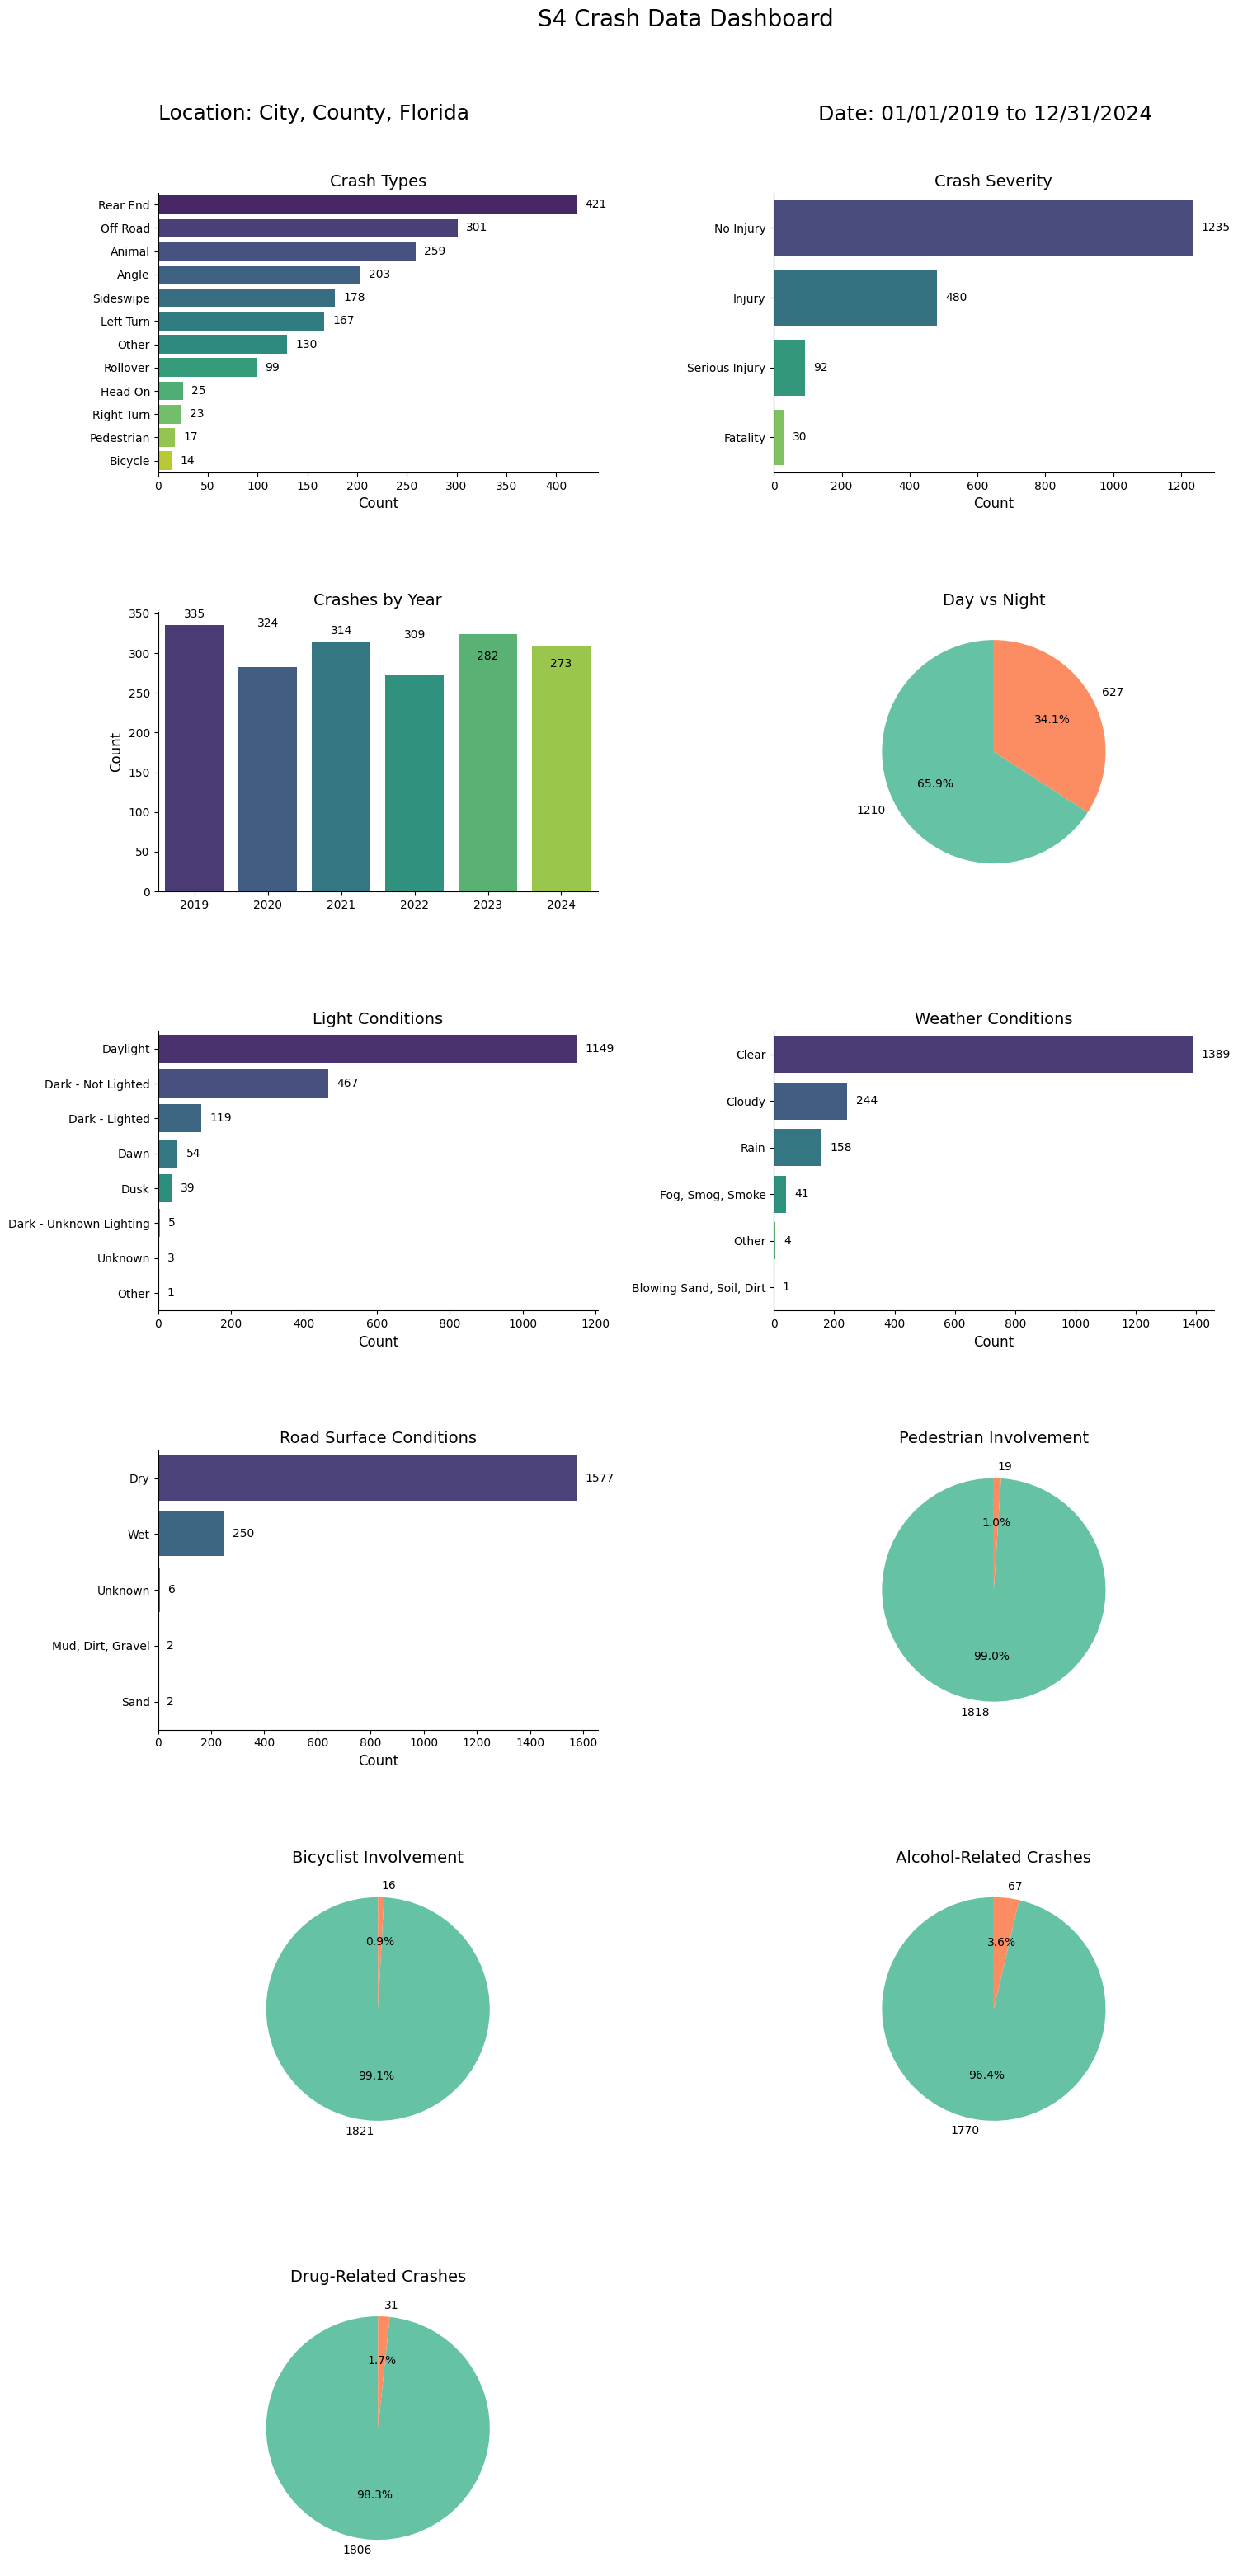

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Create a figure and axes for the dashboard with a 2x6 grid
fig, axes = plt.subplots(6, 2, figsize=(16, 32))  # Wider and taller figure for better space
fig.suptitle('S4 Crash Data Dashboard', fontsize=20, y=1.02)

# List of tables and their titles with the type of chart they should have
data_frames = [
    ('S4_CRASH_TYPE_SIMPLIFIED', 'Crash Types', 'horizontal_bar'),
    ('S4_CRASH_SEVERITY', 'Crash Severity', 'horizontal_bar'),
    ('CRASH_YEAR', 'Crashes by Year', 'vertical_bar'),
    ('S4_DAY_OR_NIGHT', 'Day vs Night', 'pie'),
    ('LIGHT_CONDITION', 'Light Conditions', 'horizontal_bar'),
    ('WEATHER_CONDITION', 'Weather Conditions', 'horizontal_bar'),
    ('ROAD_SURFACE_CONDITION', 'Road Surface Conditions', 'horizontal_bar'),
    ('S4_IS_PEDESTRIAN_INVOLVED', 'Pedestrian Involvement', 'pie'),
    ('S4_IS_BICYCLIST_INVOLVED', 'Bicyclist Involvement', 'pie'),
    ('S4_IS_ALCOHOL_RELATED', 'Alcohol-Related Crashes', 'pie'),
    ('S4_IS_DRUG_RELATED', 'Drug-Related Crashes', 'pie')
]

# Iterate through data and create charts
for i, (column, title, chart_type) in enumerate(data_frames):
    ax = axes[i // 2, i % 2]  # Determine subplot position for 6 rows and 2 columns layout
    data = df[column].value_counts().reset_index()
    data.columns = [column, 'Count']

    sns.despine(fig=None, ax=ax, top=True, right=True, left=False, bottom=False)

    if chart_type == 'vertical_bar':
        sns.barplot(data=data, x=column, y='Count', ax=ax, palette='viridis', ci=None)
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('Count', fontsize=12)
        for idx, val in enumerate(data['Count']):
            ax.text(idx, val + max(data['Count']) * 0.02, str(val), ha='center', va='bottom', fontsize=10)

    elif chart_type == 'horizontal_bar':
        sns.barplot(data=data, x='Count', y=column, ax=ax, palette='viridis', ci=None, orient='h')
        ax.set_title(title, fontsize=14)
        ax.set_xlabel('Count', fontsize=12)
        ax.set_ylabel('')
        for idx, val in enumerate(data['Count']):
            ax.text(val + max(data['Count']) * 0.02, idx, str(val), va='center', ha='left', fontsize=10)


    elif chart_type == 'pie':
            # Pie chart with percentages and actual numbers
            labels = [f"{label} ({count} | {count / data['Count'].sum():.1%})"
                      for label, count in zip(data[column], data['Count'])]
            # Collect the text elements created by ax.pie into autotexts
            _, autotexts, _ = ax.pie(data['Count'], labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(data)))
            ax.set_title(title, fontsize=14)

            for text, count in zip(autotexts, data['Count']):
                text.set_text(f"{count}")  # Show count instead of percentage in the chart


# Remove empty subplots (if any)
for j in range(i + 1, 6 * 2):  # Total grid slots (6 rows × 2 columns)
    fig.delaxes(axes[j // 2, j % 2])

# Adjust spacing for clarity and add padding around axes
plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.4)


# Add form at the top (location name and data date)
location_name = "Location: City, County, Florida"
data_date = "Date: 01/01/2019 to 12/31/2024"
fig.text(0.1, 0.98, location_name, fontsize=18, ha='left', va='center')
fig.text(0.6, 0.98, data_date, fontsize=18, ha='left', va='center')


# Save the dashboard as a PDF
pdf_file = "crash_dashboard.pdf"
with PdfPages(pdf_file) as pdf:
    pdf.savefig(fig)

print(f"Dashboard saved as {pdf_file}")


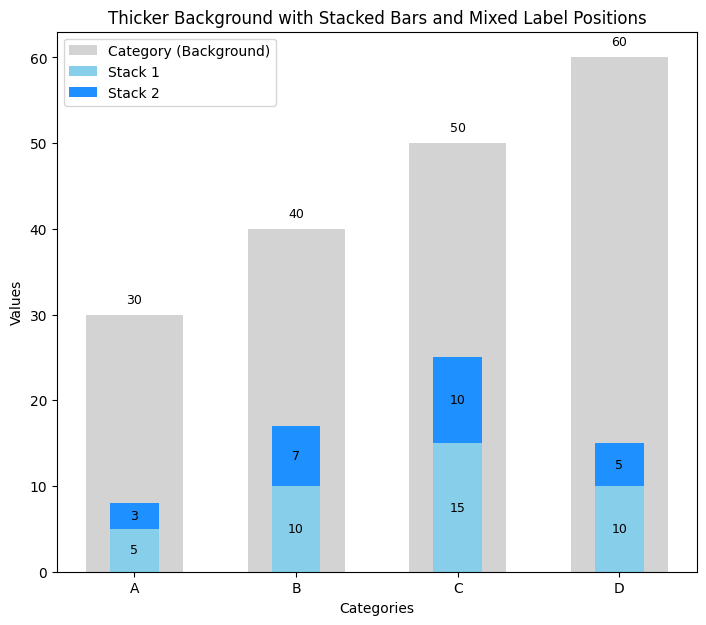

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['A', 'B', 'C', 'D']
background_values = [30, 40, 50, 60]  # Thicker background bars
stack1 = [5, 10, 15, 10]
stack2 = [3, 7, 10, 5]

x = np.arange(len(categories))  # X-axis positions

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size if needed

# Plot background bars (thicker, in the back)
ax.bar(
    x,
    background_values,
    width=0.6,
    color='lightgray',
    label='Category (Background)'
)

# Add labels for background bars (at the top of the bar)
for i, val in enumerate(background_values):
    ax.text(x[i], val + 1, str(val), ha='center', va='bottom', fontsize=9)

# Plot stacked bars (narrower, in the front)
stacked_bar_width = 0.3
ax.bar(
    x,
    stack1,
    width=stacked_bar_width,
    color='skyblue',
    label='Stack 1'
)
ax.bar(
    x,
    stack2,
    width=stacked_bar_width,
    bottom=stack1,
    color='dodgerblue',
    label='Stack 2'
)

# Add labels for stack1 (middle of the bar)
for i, val in enumerate(stack1):
    ax.text(x[i], val / 2, str(val), ha='center', va='center', fontsize=9)

# Add labels for stack2 (middle of its section)
for i, (s1, s2) in enumerate(zip(stack1, stack2)):
    middle_point = s1 + (s2 / 2)  # Middle of the stack
    ax.text(x[i], middle_point, str(s2), ha='center', va='center', fontsize=9)

# Configure chart
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Thicker Background with Stacked Bars and Mixed Label Positions')
ax.legend()

# Add padding around the figure
plt.subplots_adjust(left=0.15, right=0.95, top=1, bottom=0.1)

# Show plot
plt.show()
